No path specified. Models will be saved in: "AutogluonModels\ag-20230201_083946\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230201_083946\"
AutoGluon Version:  0.6.1
Python Version:     3.9.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    4000
Train Data Columns: 117
Label Column: In-hospital_death
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...


                      model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2    0.494451   0.534202        2.042158       0.855021  38.837297                 0.003999                0.010000           2.519126            2       True         14
1           LightGBM_BAG_L1    0.477500   0.495575        0.186002       0.069007   8.223354                 0.186002                0.069007           8.223354            1       True          4
2         LightGBMXT_BAG_L1    0.476309   0.481108        0.184999       0.076000   8.432626                 0.184999                0.076000           8.432626            1       True          3
3            XGBoost_BAG_L1    0.455243   0.491803        0.284998       0.097236   7.330379                 0.284998                0.097236           7.330379            1       True         11
4           CatBoost

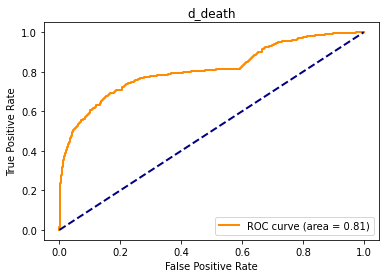

In [33]:

import pandas as pd
import numpy as np
from sklearn import metrics
#表格预测
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



train_data = pd.read_csv('PhysionetChallenge2012-set-a.csv')
test_data = pd.read_csv('PhysionetChallenge2012-set-b.csv')

large_val_cols = ['MechVentStartTime','MechVentDuration']
for c in large_val_cols:
    train_data[c] = np.log(train_data[c]+1)


predictor = TabularPredictor(label='In-hospital_death',eval_metric='f1').fit(train_data=train_data.drop(columns=['recordid','Survival']),presets='best_quality',num_gpus=1)

#sample_weight='balance_weight'可添加，处理数据不平衡问题。
#,presets='best_quality' 添加，训练时间边长
#eval_metric [balanced_accuracy]  [f1_macro]

#predictions标签  proba概率
predictions = predictor.predict(test_data)
proba = predictor.predict_proba(test_data)


predictions = predictions.to_frame()

test_data['predictions'] =  predictions.iloc[:,-1] #最后一列
test_data['1'] = proba.iloc[:,-1] #第三列


test_data.to_csv('test_data.csv')

#多模型排行榜
leaderboard = predictor.leaderboard(test_data)
leaderboard.to_csv('leaderboard.csv')

#输出
# submission = pd.DataFrame({'predictions':predictions})
# submission.to_csv('submission.csv',index=False)

#submission = pd.DataFrame({'proba':proba})
#submission.to_csv('submission.csv',index=False)



from sklearn.metrics import confusion_matrix

# y_true表示真实标签， y_pred表示预测标签
y_true = test_data['In-hospital_death']
y_pred = predictions
y_proba = proba.iloc[:,-1]

# 使用混淆矩阵计算特异性和敏感性
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm.ravel()

specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


fpr, tpr, thresholds = metrics.roc_curve(y_true, y_proba)
roc_auc = metrics.auc(fpr,tpr)


plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("d_death")
plt.legend(loc="lower right")
#plt.savefig('auc_roc.pdf')
plt.show()





No path specified. Models will be saved in: "AutogluonModels\ag-20230201_092031\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Using predefined sample weighting strategy: balance_weight. Evaluation metrics will ignore sample weights, specify weight_evaluation=True to instead report weighted metrics.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230201_092031\"
AutoGluon Version:  0.6.1
Python Version:     3.9.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    4000
Train Data Columns: 117
Label Column: In-hospital_death
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify pro

                      model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMXT_BAG_L1    0.875572   0.870775        0.093978       0.041015   4.339554                 0.093978                0.041015           4.339554            1       True          3
1           CatBoost_BAG_L1    0.875459   0.867914        0.042907       0.093898  17.872255                 0.042907                0.093898          17.872255            1       True          7
2       WeightedEnsemble_L2    0.875107   0.882815        2.799471       1.487236  59.429453                 0.007000                0.000000           0.783309            2       True         14
3            XGBoost_BAG_L1    0.869598   0.873196        0.317207       0.074830   6.029882                 0.317207                0.074830           6.029882            1       True         11
4           LightGBM

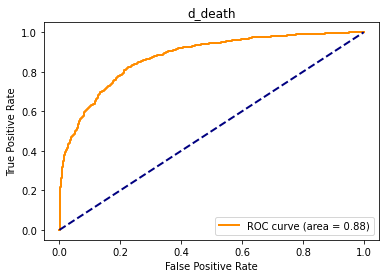

In [34]:

import pandas as pd
import numpy as np
from sklearn import metrics
#表格预测
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



train_data = pd.read_csv('PhysionetChallenge2012-set-a.csv')
test_data = pd.read_csv('PhysionetChallenge2012-set-b.csv')

large_val_cols = ['MechVentStartTime','MechVentDuration']
for c in large_val_cols:
    train_data[c] = np.log(train_data[c]+1)


predictor = TabularPredictor(label='In-hospital_death',eval_metric='roc_auc',sample_weight='balance_weight'
                            
                            ).fit(train_data=train_data.drop(columns=['recordid','Survival']),presets='best_quality',num_gpus=1)

#sample_weight='balance_weight'可添加，处理数据不平衡问题。
#,presets='best_quality' 添加，训练时间边长
#eval_metric [balanced_accuracy]  [f1_macro]

#predictions标签  proba概率
predictions = predictor.predict(test_data)
proba = predictor.predict_proba(test_data)


predictions = predictions.to_frame()

test_data['predictions'] =  predictions.iloc[:,-1] #最后一列
test_data['1'] = proba.iloc[:,-1] #第三列


test_data.to_csv('test_data.csv')

#多模型排行榜
leaderboard = predictor.leaderboard(test_data)
leaderboard.to_csv('leaderboard.csv')

#输出
# submission = pd.DataFrame({'predictions':predictions})
# submission.to_csv('submission.csv',index=False)

#submission = pd.DataFrame({'proba':proba})
#submission.to_csv('submission.csv',index=False)



from sklearn.metrics import confusion_matrix

# y_true表示真实标签， y_pred表示预测标签
y_true = test_data['In-hospital_death']
y_pred = predictions
y_proba = proba.iloc[:,-1]

# 使用混淆矩阵计算特异性和敏感性
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm.ravel()

specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


fpr, tpr, thresholds = metrics.roc_curve(y_true, y_proba)
roc_auc = metrics.auc(fpr,tpr)


plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("d_death")
plt.legend(loc="lower right")
#plt.savefig('auc_roc.pdf')
plt.show()





In [3]:
data=pd.read_csv("PhysionetChallenge2012-set-a.csv")
import pandas as pd
import numpy as np
# importing the MICE from fancyimpute library
from fancyimpute import IterativeImputer

# calling the MICE class
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
data=pd.DataFrame(mice_imputer.fit_transform(data),columns = data.columns)



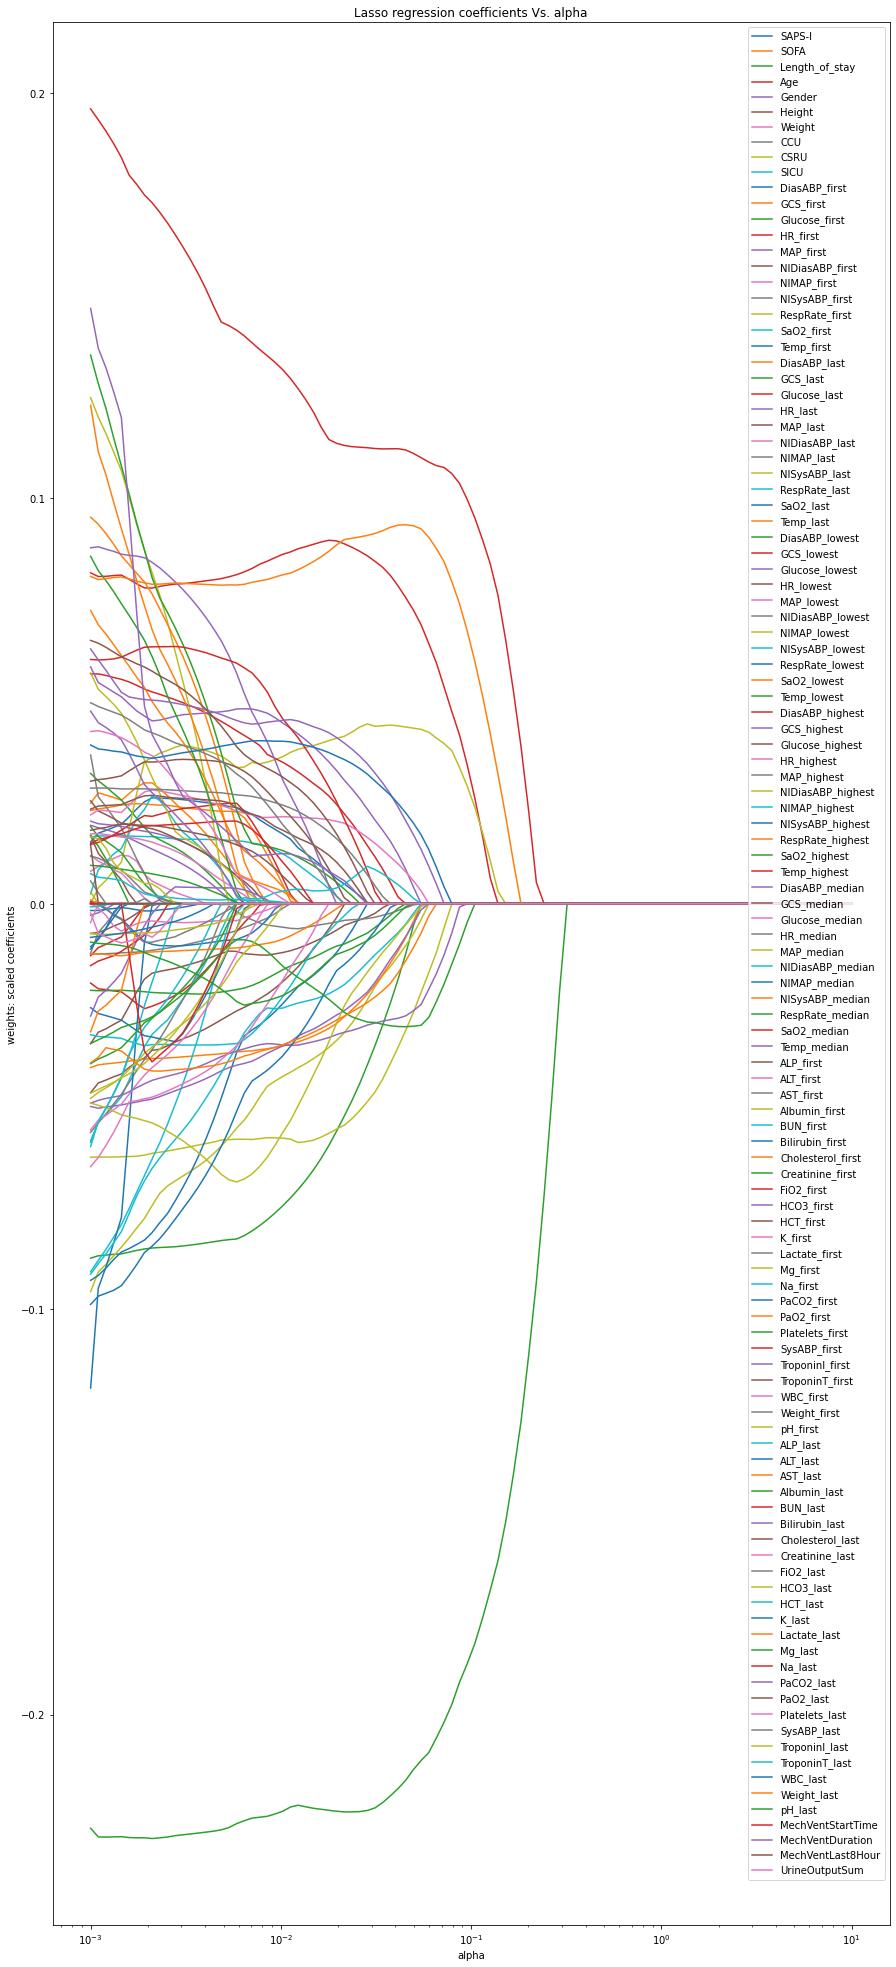

In [16]:
#LASSO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import warnings
#warnings.filterwarnings('ignore')
##  读取数据
df = data.drop(columns=['recordid','Survival'])

scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
y = df_sc['In-hospital_death']
X = df_sc.drop(columns=['In-hospital_death']) # becareful inplace= False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

alpha_lasso = 10**np.linspace(-3,1,100)
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
plt.figure(figsize=(15,35))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('In-hospital_death',axis=1, inplace=False).columns)
plt.show()

GCS_last             0.224048
BUN_last             0.132183
Age                  0.086021
Lactate_last         0.080966
Length_of_stay       0.074958
CSRU                 0.057819
Albumin_first        0.057227
SysABP_first         0.046147
Bilirubin_last       0.045195
HR_last              0.044889
NISysABP_last        0.042838
WBC_last             0.040072
PaCO2_first          0.037988
RespRate_first       0.036050
GCS_highest          0.035272
Temp_last            0.035195
Glucose_last         0.035154
Weight_last          0.034948
Temp_median          0.034789
HCO3_first           0.031779
PaO2_last            0.031511
NIDiasABP_median     0.025884
SaO2_last            0.025160
FiO2_last            0.024486
HCT_first            0.023962
Na_first             0.023586
pH_last              0.022824
HR_highest           0.021433
Lactate_first        0.020110
MAP_last             0.019648
Creatinine_last      0.019617
ALP_first            0.018320
SAPS-I               0.017476
Temp_lowes

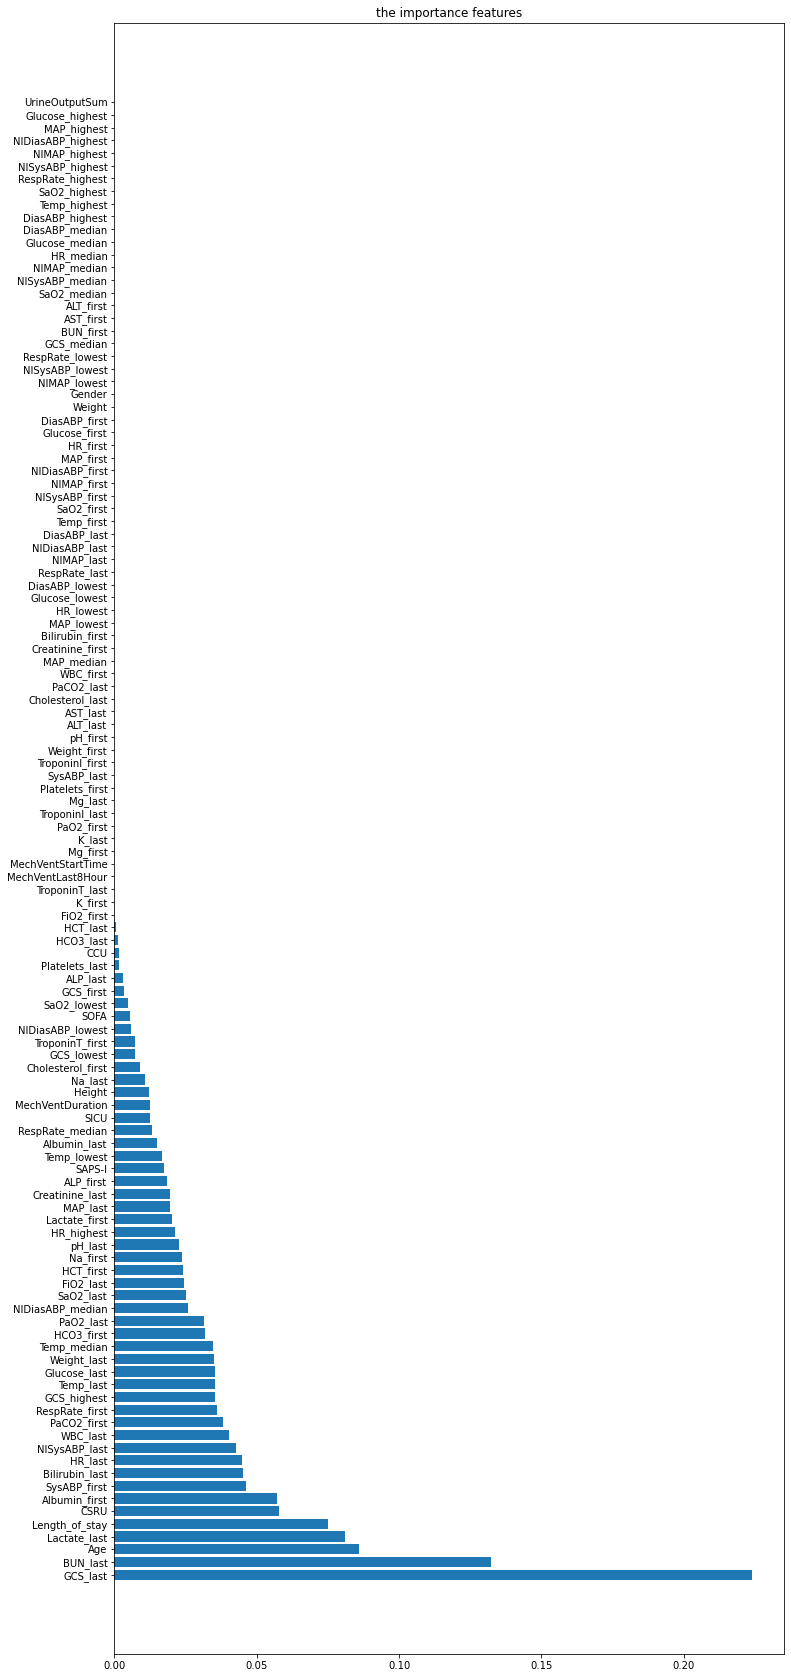

In [18]:
pd.set_option('display.width', 10000) # 设置字符显示宽度
pd.set_option('display.max_rows', None) # 设置显示最大行
pd.set_option('display.max_columns', None) # 设置显示最大列，None为显示所有列


lasso = Lasso(alpha=10**(-2))
model_lasso = lasso.fit(X_train, y_train)
coef = pd.Series(model_lasso.coef_,index=X_train.columns)
print(coef.abs().sort_values(ascending = False))

fea = X_train.columns
a = pd.DataFrame()
a['feature'] = fea
a['importance'] = abs(coef.values)

a = a.sort_values('importance',ascending = False)
plt.figure(figsize=(12,30))
plt.barh(a['feature'],a['importance'])
plt.title('the importance features')
plt.show()